# 1.1 Fundamentos de la técnica

El algoritmo **K-Means** es una técnica de aprendizaje no supervisado utilizada para agrupar un conjunto de datos en K grupos o clústeres basándose en la similitud de sus características.

Su objetivo es minimizar la variabilidad dentro de los grupos y maximizar la diferencia entre grupos.

El proceso consiste en:

1. Elegir aleatoriamente K puntos como centroides iniciales.

2. Asignar cada punto de datos al centroide más cercano.

3. Calcular nuevos centroides como el promedio de los puntos asignados.

4. Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente.

# 1.2 Modelo Matemático

El objetivo del algoritmo es minimizar la suma de los cuadrados de las distancias entre los puntos y su centroide correspondiente.

$$J=\sum_{i=1}^K\sum_{x\in C_i}||x-\mu _i||^2$$

donde:
* $K$: número de clusters.
* $C_i$: conjunto de puntos pertenecientes al cluster $i$
* $\mu _i$: centroide del cluster $i$
* $∣∣x−\mu _𝑖∣∣^2$: distancia euclidiana cuadrada entre un punto y su centroide.

# 1.3 Descripción de librerías, clases y funciones
|Librería|	Clase / Función	|Descripción|
|-|-|-|
|numpy|array, mean, std	|Manipulación de datos numéricos y operaciones vectoriales|
|matplotlib.pyplot|	scatter, plot|	Visualización de los datos y clusters|
|pandas|	DataFrame, describe()|	Análisis y resumen estadístico|
|sklearn.datasets|	make_blobs|	Genera datos sintéticos con estructura de clusters|
|sklearn.cluster|	KMeans	|Implementa el algoritmo K-Means|
|sklearn.metrics	|confusion_matrix, accuracy_score|	Evaluación de la clasificación (solo con etiquetas reales disponibles)|

# 1.4 Pipeline
**1.4.1 Preprocesamiento de datos**

Generaremos un conjunto de datos sintético para visualizar el comportamiento del algoritmo K-Means.

Resumen estadístico del dataset:



,Feature_1,Feature_2,true_label
count,300.000000,300.000000,300.000000
mean,-0.056673,3.531955,1.000000
std,7.497026,2.230320,0.817861
min,-9.918925,-1.206764,0.000000
25%,-8.097316,1.132471,0.000000
50%,-1.277174,4.348201,1.000000
75%,9.085220,5.270442,2.000000
max,11.317358,7.171692,2.000000


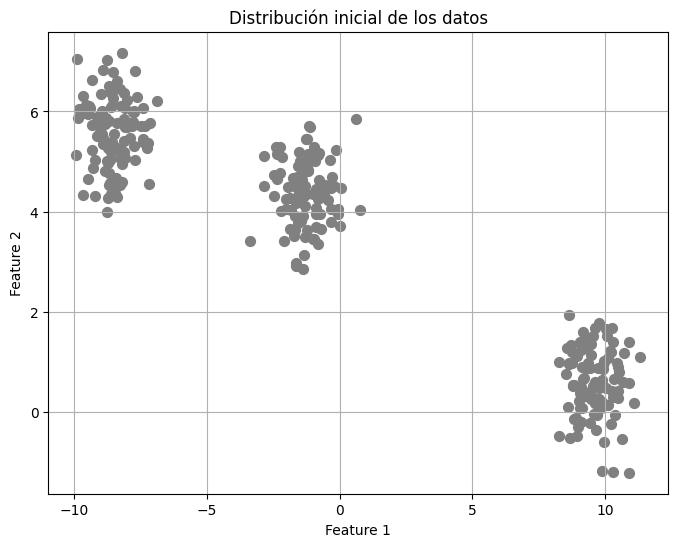

In [1]:
# =============================
# Importación de librerías
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# =============================
# Generación del dataset
# =============================
X, y_true = make_blobs(
    n_samples=300,     # número de puntos
    centers=3,         # cantidad de clusters a generar
    cluster_std=0.7,   # dispersión de cada cluster
    random_state=7     # reproducibilidad
)

# Convertimos a DataFrame para análisis estadístico
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df['true_label'] = y_true

# =============================
# Análisis estadístico previo
# =============================
print("Resumen estadístico del dataset:\n")
display(df.describe())

# =============================
# Visualización inicial
# =============================
plt.figure(figsize=(8,6))
plt.scatter(df["Feature_1"], df["Feature_2"], c='gray', s=50)
plt.title("Distribución inicial de los datos")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

**1.4.2 Aplicación del Modelo K-Means**

In [2]:
from sklearn.cluster import KMeans

# Creación del modelo
kmeans = KMeans(n_clusters=3, random_state=7, n_init=10)

# Entrenamiento (ajuste)
kmeans.fit(X)

# Predicciones de cluster
labels_pred = kmeans.predict(X)

# Coordenadas de los centroides
centroids = kmeans.cluster_centers_

print("Centroides del modelo:\n", centroids)

Centroides del modelo:
 [[-8.52822278  5.57778453]
 [ 9.60890388  0.60860572]
 [-1.25070154  4.40947444]]


**1.4.3 Visualización de Resultados**

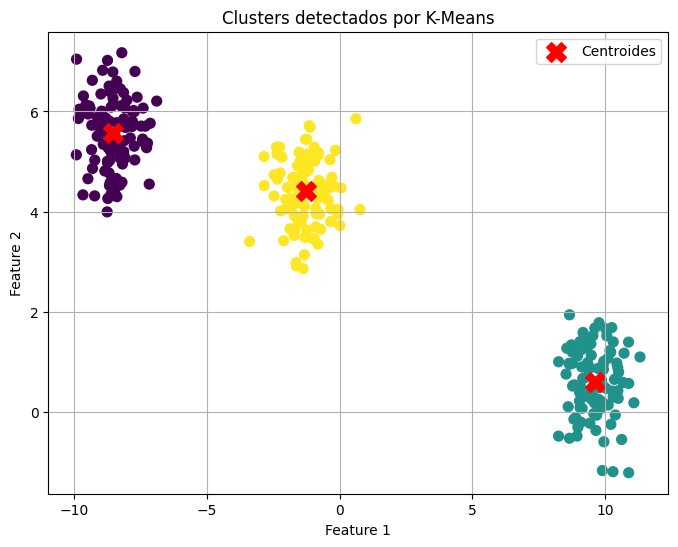

In [3]:
# Visualización de los clusters detectados
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_pred, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters detectados por K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

**1.4.4 Predicción de Nuevos Puntos**

Se puede crear una función que reciba un nuevo patrón y determine a qué cluster pertenece.

In [4]:
def predecir_cluster(punto):
    """
    Recibe un punto [x1, x2] y devuelve el número de cluster asignado.
    """
    cluster = kmeans.predict([punto])[0]
    print(f"El punto {punto} pertenece al cluster {cluster}")
    return cluster

# Ejemplo de uso
predecir_cluster([0.5, 2.5])

El punto [0.5, 2.5] pertenece al cluster 2


np.int32(2)

**1.4.5 Evaluación del Modelo**

Aunque K-Means es no supervisado, podemos evaluar su desempeño comparando con etiquetas reales (solo en datos sintéticos).

Métricas a usar:

* Matriz de Confusión: compara las etiquetas verdaderas con las predichas.

* Accuracy: mide el porcentaje de aciertos (reordenando etiquetas si es necesario).

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Debido a que los clusters no tienen orden fijo, se reordenan las etiquetas para comparación
# (Este paso es sólo válido en datasets sintéticos con etiquetas conocidas)
from scipy.stats import mode

labels_corrected = np.zeros_like(labels_pred)
for i in range(3):
    mask = (labels_pred == i)
    labels_corrected[mask] = mode(y_true[mask], keepdims=True)[0]

# Métricas
acc = accuracy_score(y_true, labels_corrected)
matriz = confusion_matrix(y_true, labels_corrected)

print(f"Accuracy del modelo: {acc:.2f}")
print("\nMatriz de confusión:")
print(matriz)

Accuracy del modelo: 1.00

Matriz de confusión:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


**1.4.6 Visualización de Comparación Real vs Predicha**

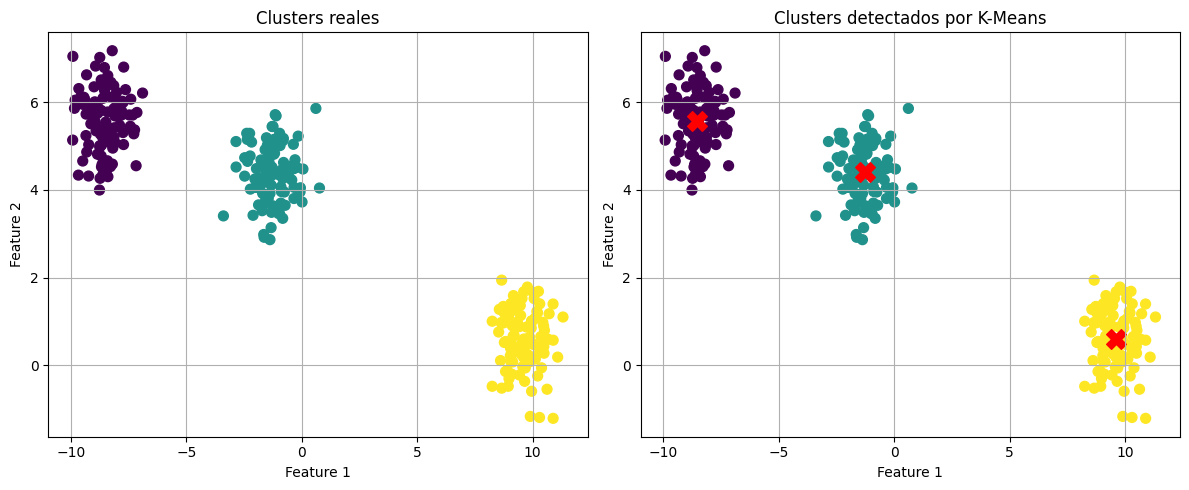

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Etiquetas reales
ax[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
ax[0].set_title("Clusters reales")

# Etiquetas predichas
ax[1].scatter(X[:, 0], X[:, 1], c=labels_corrected, cmap='viridis', s=50)
ax[1].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
ax[1].set_title("Clusters detectados por K-Means")

for a in ax:
    a.set_xlabel("Feature 1")
    a.set_ylabel("Feature 2")
    a.grid(True)

plt.tight_layout()
plt.show()

**Conclusiones**

El algoritmo K-Means logra agrupar datos no etiquetados en grupos homogéneos basados en la distancia entre puntos.

Su simplicidad lo hace ideal para exploración y segmentación de datos, aunque presenta limitaciones cuando los grupos tienen formas no esféricas o tamaños desiguales.


---

\
**Referencias Bibliográficas**

* Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O’Reilly Media.

* Scikit-learn Documentation. https://scikit-learn.org/stable/modules/clustering.html#k-means

* Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.

* Han, J., Kamber, M., & Pei, J. (2011). Data Mining: Concepts and Techniques. Morgan Kaufmann.

* Implementación de KMeans con Scikit-learn. (2024). Ejemplo educativo de clustering no supervisado en Python.